In [19]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.datasets import load_wine

# Fix the random seed for reproducibility
# !! Important !! : do not change this
seed = 1234
np.random.seed(seed)

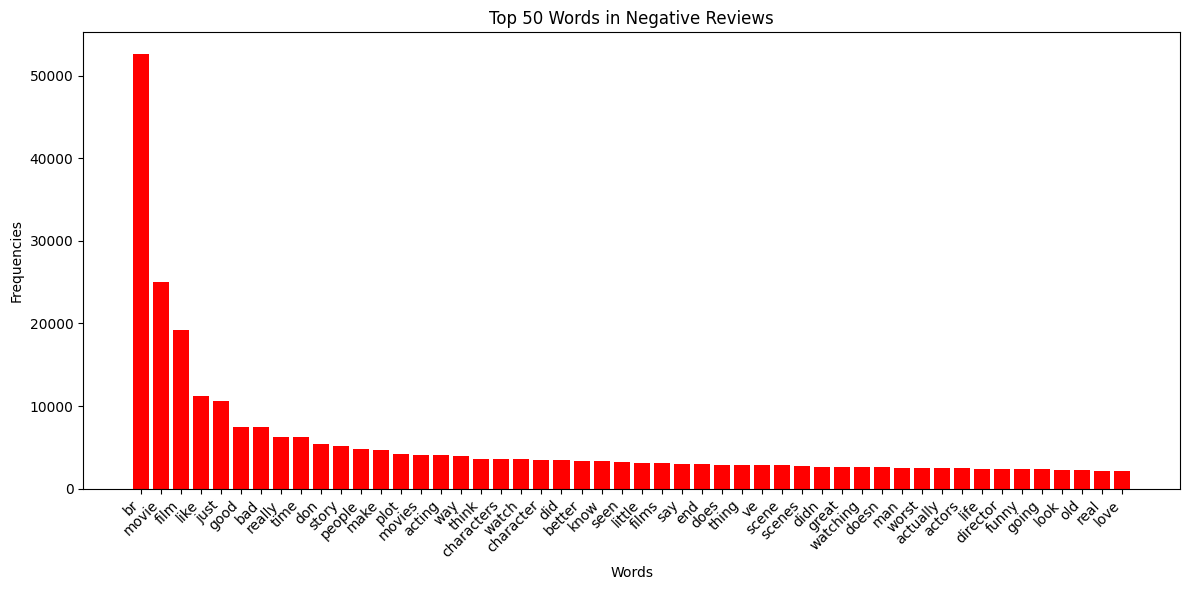

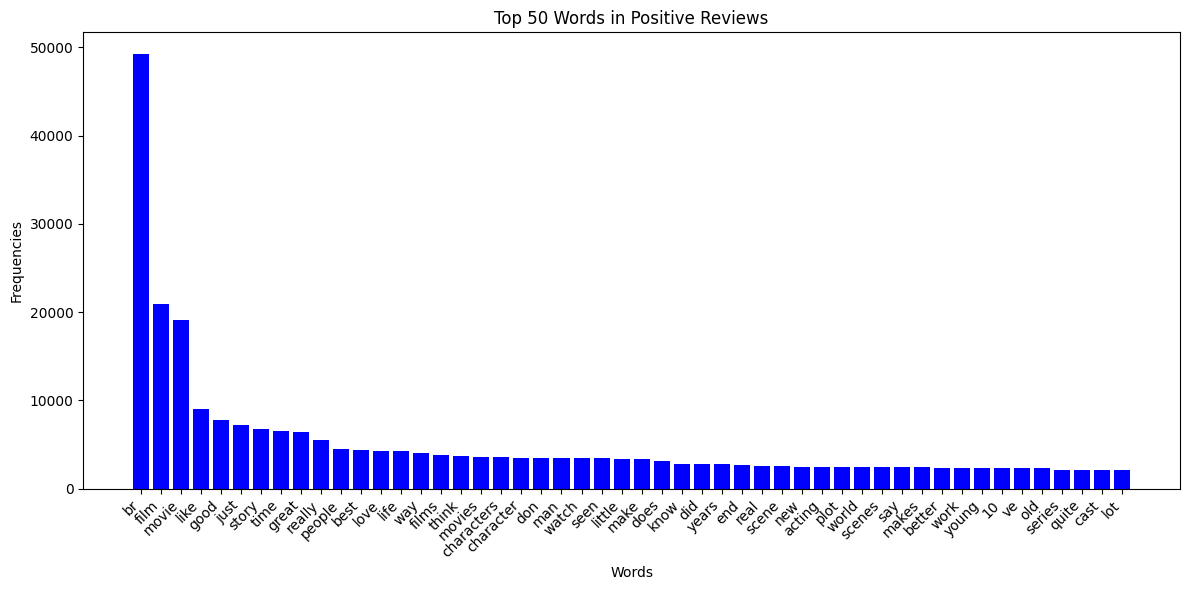

In [20]:
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Directories
pos_dir = 'train/pos'
neg_dir = 'train/neg'

test_pos_dir = 'test/pos'
test_neg_dir = 'test/neg'

def load_texts(folder_path):
    texts = []
    for filename in os.listdir(folder_path):
        filepath = os.path.join(folder_path, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            texts.append(f.read())
    return texts

# Load data
pos_texts = load_texts(pos_dir)
neg_texts = load_texts(neg_dir)

test_post_texts = load_texts(test_pos_dir)
test_neg_texts = load_texts(test_neg_dir)

vectorizer = CountVectorizer(stop_words='english', lowercase=True)

X_pos = vectorizer.fit_transform(pos_texts)
vocab_pos = vectorizer.get_feature_names_out()
counts_pos = X_pos.toarray().sum(axis=0)
freq_pos = list(zip(vocab_pos, counts_pos))

X_neg = vectorizer.fit_transform(neg_texts)
vocab_neg = vectorizer.get_feature_names_out()
counts_neg = X_neg.toarray().sum(axis=0)
freq_neg = list(zip(vocab_neg, counts_neg))

top_pos = Counter(dict(freq_pos)).most_common(50)
top_neg = Counter(dict(freq_neg)).most_common(50)

def plot_top_words(data, title, color):
    words, counts = zip(*data)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color=color)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequencies')
    plt.tight_layout()
    plt.show()

plot_top_words(top_neg, 'Top 50 Words in Negative Reviews', 'red')
plot_top_words(top_pos, 'Top 50 Words in Positive Reviews', 'blue')

In [21]:
from sklearn.metrics import accuracy_score
# LOGISTIC STUFFFF YEAHHHHHHHHHHH

# Combine texts and labels
X_train_texts = pos_texts + neg_texts
y_train_labels = [1] * len(pos_texts) + [0] * len(neg_texts)

# Vectorize the full dataset
vectorizer = CountVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(X_train_texts)

X_train, _, y_train, _ = train_test_split(X, y_train_labels, test_size=0.3, random_state=seed)

X_test_texts = test_post_texts + test_neg_texts
y_test_labels = [1] * len(test_post_texts) + [0] * len(test_neg_texts)

X = vectorizer.transform(X_test_texts)
X_test, _, y_test, _ = train_test_split(X, y_test_labels, test_size=0.7, random_state=seed)

print('Number of training examples:', X_train.shape[0])
print('Number of testing examples:', X_test.shape[0])
print('Vocabulary size:', X_train.shape[1])

# make classifier
classifier = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True)
print('\nTraining a model with', X_train.shape[0], 'examples.....')
classifier.fit(X_train, y_train)


train_predictions = classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print('\nTraining accuracy:', format(100 * train_accuracy, '.2f'))


test_predictions = classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print('Testing accuracy:', format(100 * test_accuracy, '.2f'))

Number of training examples: 17500
Number of testing examples: 7500
Vocabulary size: 74538

Training a model with 17500 examples.....

Training accuracy: 98.63
Testing accuracy: 85.05
